# Single-cell RNA Sequencing of human scalp: Preprocessing

Data Source Acknowledgment: The dataset is sourced from [GSE212450](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE212450). This notebook uses sub-dataset which comprises single-cell RNA sequencing data from human scalp with alopecia areata (GSM6532922	AA8_scRNA) and control (GSM6532927	C_SD2_scRNA).

Reference: Ober-Reynolds B, Wang C, Ko JM, Rios EJ et al. Integrated single-cell chromatin and transcriptomic analyses of human scalp identify gene-regulatory programs and critical cell types for hair and skin diseases. Nat Genet 2023 Aug;55(8):1288-1300. PMID: 37500727

It's essential to emphasize that this dataset is exclusively utilized for Python practice purposes within this repository. This notebook will use this dataset to practice data cleaning techniques and clustering.

In [1]:
#using SCanalysis environment
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scanpy as sc
import scvi
import anndata as ad

In [2]:
import warnings
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", RuntimeWarning)

In [3]:
sc.settings.verbosity = 0
sc.settings.set_figure_params(
    dpi=80,
    facecolor="white",
    frameon=False,)

## 1. Data combine

In [4]:
#case
adata_CASE = sc.read_h5ad('CASE_cleaned.h5ad')
adata_CASE

AnnData object with n_obs × n_vars = 4809 × 33538
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'doublet'
    var: 'gene_ids', 'feature_types', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'cells_removed'

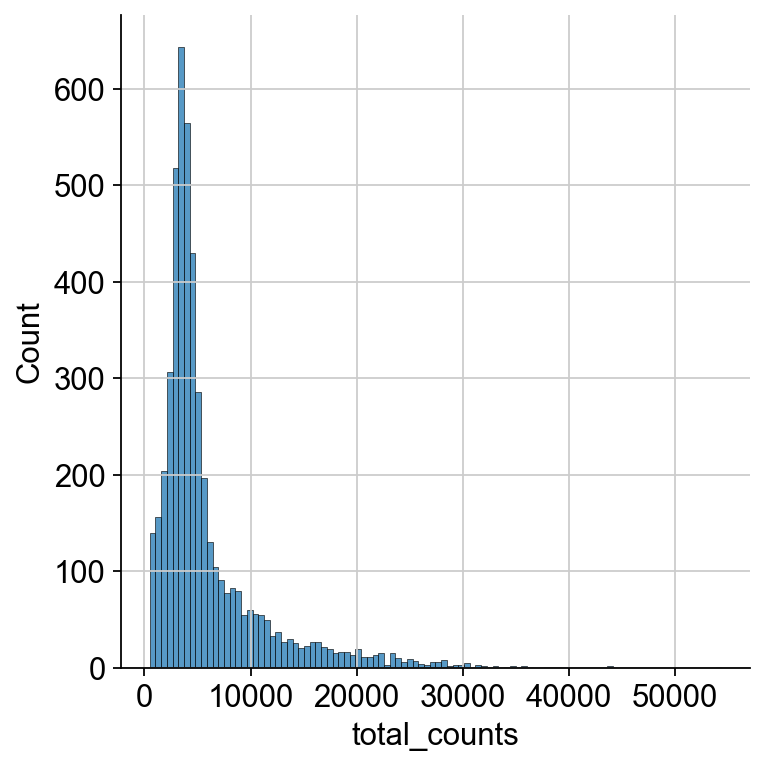

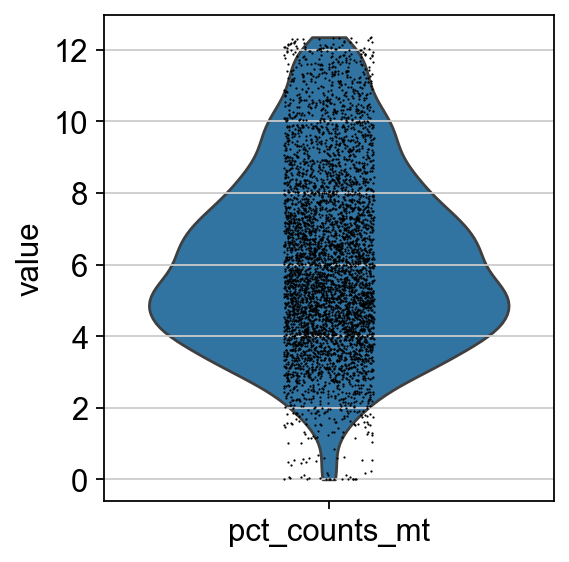

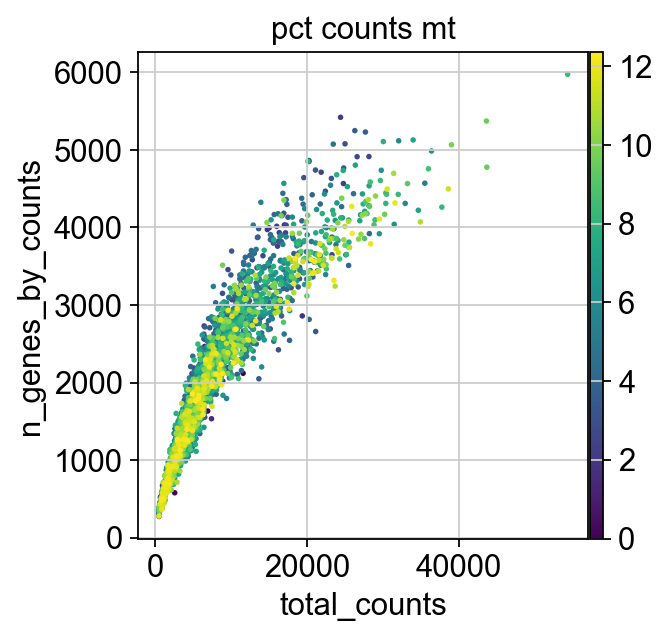

In [5]:
plot1 = sns.displot(adata_CASE.obs["total_counts"], bins=100, kde=False)
plot2 = sc.pl.violin(adata_CASE, "pct_counts_mt")
plot3 = sc.pl.scatter(adata_CASE, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

In [6]:
#control
adata_CON = sc.read_h5ad('CON_cleaned.h5ad')
adata_CON

AnnData object with n_obs × n_vars = 1890 × 33538
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'doublet'
    var: 'gene_ids', 'feature_types', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'cells_removed'

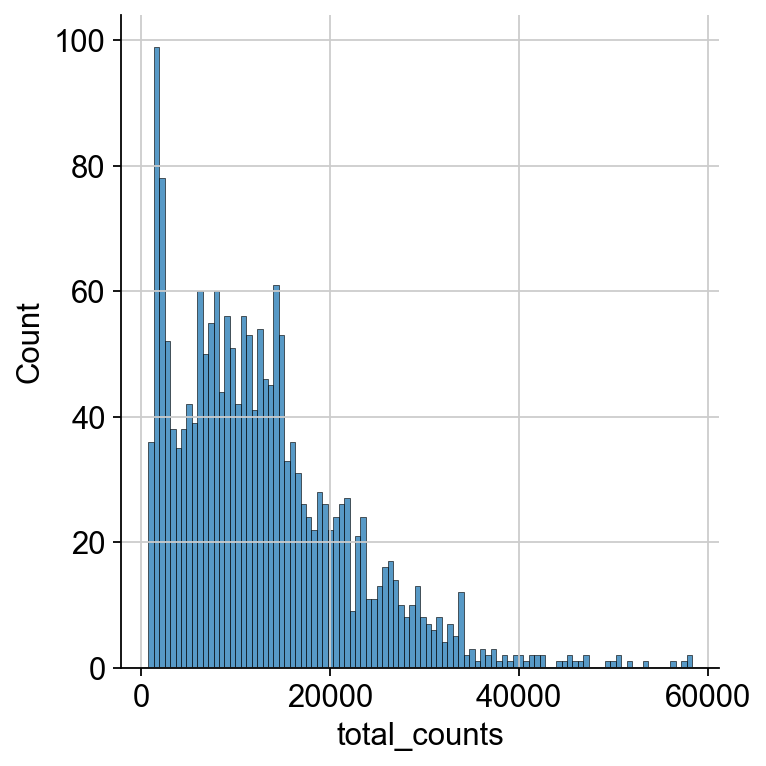

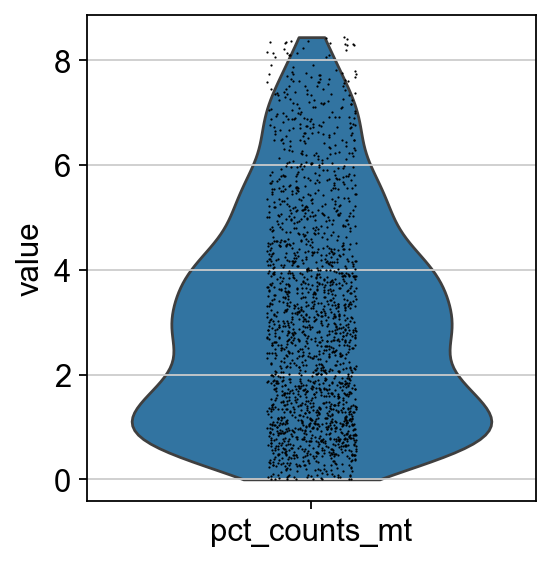

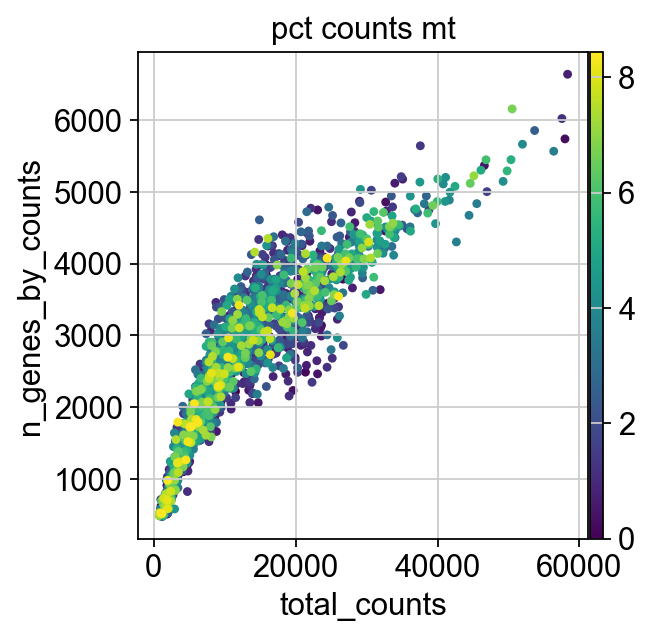

In [7]:
plot1 = sns.displot(adata_CON.obs["total_counts"], bins=100, kde=False)
plot2 = sc.pl.violin(adata_CON, "pct_counts_mt")
plot3 = sc.pl.scatter(adata_CON, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

In [9]:
adata_CASE.obs['sample'] = 'case'
adata_CASE.obs

,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,pct_counts_mt,pct_counts_ribo,pct_counts_hb,doublet,sample
AAACCCAAGTGCCCGT-1,1390,7.237778,3838.0,8.252967,28.087546,2.813966,12.714955,0.000000,False,case
AAACCCACAAGTAGTA-1,1632,7.398174,4743.0,8.464636,29.833439,9.614168,19.734344,0.000000,False,case
AAACCCAGTTACGTAC-1,1566,7.356918,4575.0,8.428580,29.224044,3.278688,17.049179,0.021858,False,case
AAACCCATCTATCACT-1,1114,7.016610,3443.0,8.144389,31.919837,5.198955,32.645950,0.029044,False,case
AAACCCATCTGGGCCA-1,1663,7.416980,5504.0,8.613412,26.235465,5.032704,26.017443,0.000000,False,case
...,...,...,...,...,...,...,...,...,...,...
TTTGGTTTCTACGGGC-1,1319,7.185387,4149.0,8.330864,29.693902,3.398409,27.452396,0.000000,False,case
TTTGTTGAGTTTGGCT-1,3638,8.199464,12515.0,9.434763,16.803835,3.196165,15.908909,0.000000,False,case
TTTGTTGCAGCCCACA-1,3706,8.217978,14378.0,9.573524,24.189734,7.622757,14.278759,0.013910,False,case
TTTGTTGGTAGTCCTA-1,1390,7.237778,3943.0,8.279951,26.933807,7.785950,29.596754,0.000000,False,case


In [10]:
adata_CON.obs['sample'] = 'control'
adata_CON.obs

,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,pct_counts_mt,pct_counts_ribo,pct_counts_hb,doublet,sample
AAACCCAAGGCGTTAG-1,1336,7.198184,4017.0,8.298539,20.786657,4.779686,21.906897,0.000000,False,control
AAACCCATCAGTGTGT-1,2648,7.881937,11532.0,9.352968,17.525147,0.294832,25.884495,0.017343,False,control
AAACGAATCGCAGTGC-1,2378,7.774436,7435.0,8.914088,16.005380,2.945528,21.600538,0.094149,False,control
AAACGCTAGCTGGCCT-1,1561,7.353722,6618.0,8.797700,27.394983,4.653974,38.818375,0.000000,False,control
AAACGCTCAACAGCCC-1,3066,8.028455,14769.0,9.600353,19.094048,3.155257,24.889973,0.000000,False,control
...,...,...,...,...,...,...,...,...,...,...
TTTGGTTGTTACGTAC-1,2464,7.809947,23097.0,10.047502,30.800537,0.428627,29.774431,0.069273,False,control
TTTGTTGGTCTAGTGT-1,3420,8.137688,10317.0,9.241645,18.067268,5.137152,9.179025,0.000000,False,control
TTTGTTGGTGATTGGG-1,3096,8.038189,9381.0,9.146548,17.759301,4.018761,13.879117,0.000000,False,control
TTTGTTGGTGGATTTC-1,3985,8.290544,22995.0,10.043076,19.830398,6.236138,23.787781,0.065232,False,control


In [12]:
adata = sc.concat([adata_CASE, adata_CON])

/Applications/anaconda3/envs/SCanalysis/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [13]:
adata

AnnData object with n_obs × n_vars = 6699 × 33538
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'doublet', 'sample'

In [14]:
adata.obs_names_make_unique()

In [15]:
adata

AnnData object with n_obs × n_vars = 6699 × 33538
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'doublet', 'sample'

In [16]:
#save combine data
adata.write_h5ad('combined.h5ad')

## 2. Data annotation using Celltypist

In [32]:
import celltypist
from celltypist import models

In [6]:
#models.get_all_models()
#Adult_Human_Skin.pkl
models.download_models(
    force_update=True, model=["Immune_All_Low.pkl", "Adult_Human_Skin.pkl"]
)

📜 Retrieving model list from server https://celltypist.cog.sanger.ac.uk/models/models.json
📚 Total models in list: 50
📂 Storing models in /Users/chiranan/.celltypist/data/models
💾 Total models to download: 2
💾 Downloading model [1/2]: Immune_All_Low.pkl
💾 Downloading model [2/2]: Adult_Human_Skin.pkl


In [11]:
models.models_path

'/Users/chiranan/.celltypist/data/models'

In [27]:
model_skin = models.Model.load(model = 'Adult_Human_Skin.pkl')

In [28]:
model_skin.cell_types

array(['DC1', 'DC2', 'Differentiated_KC', 'F1', 'F2', 'F3', 'ILC1_3',
       'ILC1_NK', 'ILC2', 'Inf_mac', 'LC', 'LE1', 'LE2', 'Macro_1',
       'Macro_2', 'Mast_cell', 'Melanocyte', 'MigDC', 'Mono_mac', 'NK',
       'Pericyte_1', 'Pericyte_2', 'Plasma', 'Schwann_1', 'Schwann_2',
       'Tc', 'Th', 'Treg', 'Undifferentiated_KC', 'VE1', 'VE2', 'VE3',
       'migLC', 'moDC'], dtype=object)

In [13]:
adata = sc.read_h5ad('combined.h5ad')

In [14]:
#make copy of adata
adata_celltypist = adata.copy()

In [22]:
sc.pp.normalize_total(adata_celltypist, target_sum=1e4) ## normalize to 10,000 counts per cell
sc.pp.log1p(adata_celltypist)

In [25]:
adata_celltypist.X = adata_celltypist.X.toarray()

In [33]:
predictions = celltypist.annotate(adata_celltypist, model = model_skin, majority_voting = False)

🔬 Input data has 6699 cells and 33538 genes
🔗 Matching reference genes in the model
🧬 3295 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!


In [34]:
predictions.predicted_labels

,predicted_labels
AAACCCAAGTGCCCGT-1,Th
AAACCCACAAGTAGTA-1,Tc
AAACCCAGTTACGTAC-1,Treg
AAACCCATCTATCACT-1,Th
AAACCCATCTGGGCCA-1,Th
...,...
TTTGGTTGTTACGTAC-1,DC1
TTTGTTGGTCTAGTGT-1,F2
TTTGTTGGTGATTGGG-1,F2
TTTGTTGGTGGATTTC-1,Undifferentiated_KC


In [35]:
#Get an `AnnData` with predicted labels embedded into the cell metadata columns.

predictions_adata = predictions.to_adata()

In [46]:
predictions_adata.obs

,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,pct_counts_mt,pct_counts_ribo,pct_counts_hb,doublet,sample,predicted_labels,conf_score
AAACCCAAGTGCCCGT-1,1390,7.237778,3838.0,8.252967,28.087546,2.813966,12.714955,0.000000,False,case,Th,0.999785
AAACCCACAAGTAGTA-1,1632,7.398174,4743.0,8.464636,29.833439,9.614168,19.734344,0.000000,False,case,Tc,0.972342
AAACCCAGTTACGTAC-1,1566,7.356918,4575.0,8.428580,29.224044,3.278688,17.049179,0.021858,False,case,Treg,0.999616
AAACCCATCTATCACT-1,1114,7.016610,3443.0,8.144389,31.919837,5.198955,32.645950,0.029044,False,case,Th,0.121425
AAACCCATCTGGGCCA-1,1663,7.416980,5504.0,8.613412,26.235465,5.032704,26.017443,0.000000,False,case,Th,0.999897
...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTGTTACGTAC-1,2464,7.809947,23097.0,10.047502,30.800537,0.428627,29.774431,0.069273,False,control,DC1,0.999734
TTTGTTGGTCTAGTGT-1,3420,8.137688,10317.0,9.241645,18.067268,5.137152,9.179025,0.000000,False,control,F2,0.999987
TTTGTTGGTGATTGGG-1,3096,8.038189,9381.0,9.146548,17.759301,4.018761,13.879117,0.000000,False,control,F2,0.999267
TTTGTTGGTGGATTTC-1,3985,8.290544,22995.0,10.043076,19.830398,6.236138,23.787781,0.065232,False,control,Undifferentiated_KC,0.993985


In [47]:
sc.pp.neighbors(predictions_adata)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [48]:
sc.tl.umap(predictions_adata)

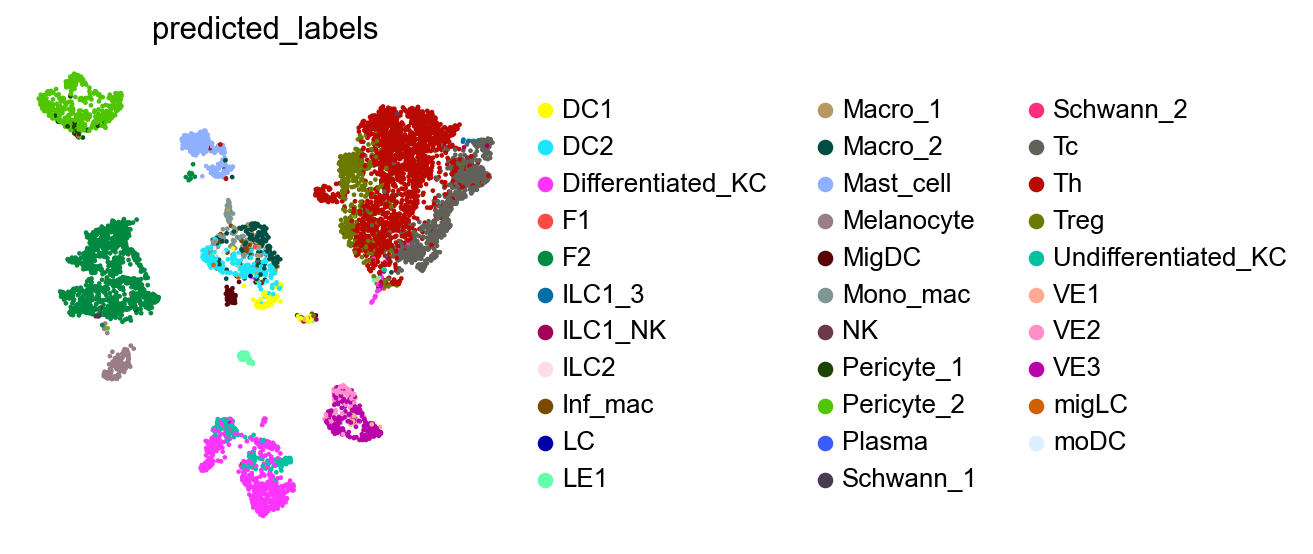

In [58]:
sc.pl.umap(predictions_adata, color = ['predicted_labels'], legend_fontsize = 'small')

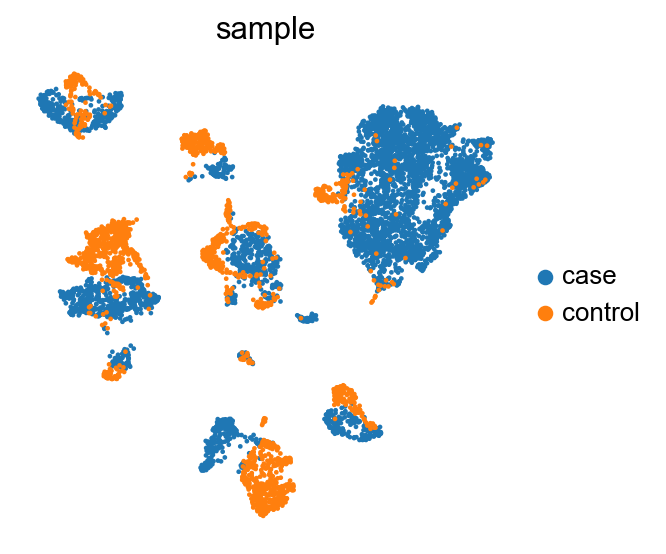

In [59]:
sc.pl.umap(predictions_adata, color = ['sample'], legend_fontsize = 'small')

In [37]:
#copy the results to our original AnnData object:
adata.obs["celltypist_skin_label"] = predictions_adata.obs.loc[adata.obs.index, "predicted_labels"]
adata.obs["celltypist_conf_score"] = predictions_adata.obs.loc[adata.obs.index, "conf_score"]

In [38]:
adata

AnnData object with n_obs × n_vars = 6699 × 33538
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'doublet', 'sample', 'celltypist_skin_label', 'celltypist_conf_score'

In [43]:
adata.obs["celltypist_skin_label"].value_counts()

celltypist_skin_label
Th                     1952
F2                     1000
Tc                      723
Differentiated_KC       524
Pericyte_2              432
Treg                    399
Mast_cell               247
VE3                     226
DC2                     218
Undifferentiated_KC     165
Macro_2                 143
Melanocyte              122
Mono_mac                105
DC1                      98
VE2                      71
LE1                      57
MigDC                    46
Macro_1                  29
VE1                      27
Pericyte_1               24
moDC                     24
Inf_mac                  17
Schwann_1                 9
ILC1_NK                   7
NK                        7
ILC1_3                    6
ILC2                      6
F1                        5
migLC                     5
LC                        2
Schwann_2                 2
Plasma                    1
Name: count, dtype: int64

In [44]:
adata.write_h5ad('unintegrate.h5ad')